In [ ]:
#                   Project :    Customer Services Request Analysis

In [ ]:
# Import Libraries

In [35]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as st
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [ ]:
# 1. Import data 311 NYC service request.

In [36]:
data = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv',low_memory=False,parse_dates=['Created Date', 'Closed Date'])
data.head()             

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [48]:
# Created Date and Closed Date’ to datetime datatype
data.dtypes

Unique Key                                  int64
Created Date                       datetime64[ns]
Closed Date                        datetime64[ns]
Agency                                     object
Agency Name                                object
Complaint Type                             object
Descriptor                                 object
Location Type                              object
Incident Zip                              float64
Incident Address                           object
Street Name                                object
Cross Street 1                             object
Cross Street 2                             object
Address Type                               object
City                                       object
Facility Type                              object
Status                                     object
Due Date                                   object
Resolution Description                     object
Resolution Action Updated Date             object


In [ ]:
# Data Cleaning

In [49]:
data.replace('Unspecified',np.nan,inplace=True)
data.sort_values("City", axis = 0, ascending = True, inplace = True, na_position ='last')
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,School Not Found,Latitude,Longitude,Location,Request_Closing_Time
188102,31043792,2015-07-11 00:25:00,2015-07-11 01:39:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11692.0,105 BEACH 61 STREET,...,14 QUEENS,QUEENS,1042488.0,154292.0,QUEENS,N,40.589981,-73.790313,"(40.58998074407277, -73.79031328313127)",01:14:00
185064,31064547,2015-07-13 10:26:32,2015-07-13 11:35:05,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11692.0,166 BEACH 60 STREET,...,14 QUEENS,QUEENS,1042700.0,154724.0,QUEENS,N,40.591165,-73.789546,"(40.59116509873905, -73.78954624023964)",01:08:33
190308,31032847,2015-07-09 00:06:00,2015-07-09 01:27:00,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11692.0,246 BEACH 77 STREET,...,14 QUEENS,QUEENS,1038538.0,154159.0,QUEENS,N,40.589641,-73.804536,"(40.58964075946563, -73.80453633186117)",01:21:00
215223,30873908,2015-06-17 21:30:55,2015-06-17 23:51:35,NYPD,New York City Police Department,Noise - House of Worship,Loud Music/Party,House of Worship,11692.0,74-05 ROCKAWAY BEACH BOULEVARD,...,14 QUEENS,QUEENS,1039209.0,153863.0,QUEENS,N,40.588824,-73.802123,"(40.588824165589685, -73.80212281539637)",02:20:40
249811,30648522,2015-05-18 21:31:19,2015-05-18 23:43:53,NYPD,New York City Police Department,Noise - House of Worship,Loud Music/Party,House of Worship,11692.0,74-05 ROCKAWAY BEACH BOULEVARD,...,14 QUEENS,QUEENS,1039209.0,153863.0,QUEENS,N,40.588824,-73.802123,"(40.588824165589685, -73.80212281539637)",02:12:34


In [50]:
data.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude,Request_Closing_Time
count,3.006980e+05,298083.000000,2.971580e+05,297158.000000,297158.000000,297158.000000,298534
mean,3.130054e+07,10848.888645,1.004854e+06,203754.534416,40.725885,-73.925630,0 days 04:18:51.832782
std,5.738547e+05,583.182081,2.175338e+04,29880.183529,0.082012,0.078454,0 days 06:05:22.141833
min,3.027948e+07,83.000000,9.133570e+05,121219.000000,40.499135,-74.254937,0 days 00:01:00
25%,3.080118e+07,10310.000000,9.919752e+05,183343.000000,40.669796,-73.972142,0 days 01:16:33
50%,3.130436e+07,11208.000000,1.003158e+06,201110.500000,40.718661,-73.931781,0 days 02:42:55.500000
75%,3.178446e+07,11238.000000,1.018372e+06,224125.250000,40.781840,-73.876805,0 days 05:21:00
max,3.231065e+07,11697.000000,1.067173e+06,271876.000000,40.912869,-73.700760,24 days 16:52:22


In [51]:
#Number of columns and rows
data.shape

(300698, 30)

In [52]:
#aggregating nan values
columns_with_nan_values=data.isnull().sum()
columns_with_nan_values

Unique Key                            0
Created Date                          0
Closed Date                        2164
Agency                                0
Agency Name                           0
Complaint Type                        0
Descriptor                         5914
Location Type                       131
Incident Zip                       2615
Incident Address                  44410
Street Name                       44410
Cross Street 1                    49279
Cross Street 2                    49779
Address Type                       2815
City                               2614
Facility Type                      2171
Status                                0
Due Date                              3
Resolution Description                0
Resolution Action Updated Date     2187
Community Board                       0
Borough                            2574
X Coordinate (State Plane)         3540
Y Coordinate (State Plane)         3540
Park Borough                       2574


In [60]:
# Removing Some Coloums that have more than 50% missing data And Unnecessary column'''
size = 300698
remove = []
for key,value in columns_with_nan_values.items():
    Proper_data = value/size
    if (Proper_data) > 0.5:
        remove.append(key)
data.drop(labels = remove, axis =1,inplace =True)

In [61]:
#aggregating nan values
columns_with_nan_values=data.isnull().sum()
columns_with_nan_values

Unique Key                            0
Created Date                          0
Closed Date                        2164
Agency                                0
Agency Name                           0
Complaint Type                        0
Descriptor                         5914
Location Type                       131
Incident Zip                       2615
Incident Address                  44410
Street Name                       44410
Cross Street 1                    49279
Cross Street 2                    49779
Address Type                       2815
City                               2614
Facility Type                      2171
Status                                0
Due Date                              3
Resolution Description                0
Resolution Action Updated Date     2187
Community Board                       0
Borough                            2574
X Coordinate (State Plane)         3540
Y Coordinate (State Plane)         3540
Park Borough                       2574


In [62]:
#Previously we had 53 columns, after cleaning the data 29 lefts only.
data.shape

(300698, 30)

In [ ]:
# 2. To create a new column ‘Request_Closing_Time’

In [63]:
data["Request_Closing_Time"] = data["Closed Date"] - data["Created Date"]
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,School Not Found,Latitude,Longitude,Location,Request_Closing_Time
188102,31043792,2015-07-11 00:25:00,2015-07-11 01:39:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11692.0,105 BEACH 61 STREET,...,14 QUEENS,QUEENS,1042488.0,154292.0,QUEENS,N,40.589981,-73.790313,"(40.58998074407277, -73.79031328313127)",01:14:00
185064,31064547,2015-07-13 10:26:32,2015-07-13 11:35:05,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11692.0,166 BEACH 60 STREET,...,14 QUEENS,QUEENS,1042700.0,154724.0,QUEENS,N,40.591165,-73.789546,"(40.59116509873905, -73.78954624023964)",01:08:33
190308,31032847,2015-07-09 00:06:00,2015-07-09 01:27:00,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11692.0,246 BEACH 77 STREET,...,14 QUEENS,QUEENS,1038538.0,154159.0,QUEENS,N,40.589641,-73.804536,"(40.58964075946563, -73.80453633186117)",01:21:00
215223,30873908,2015-06-17 21:30:55,2015-06-17 23:51:35,NYPD,New York City Police Department,Noise - House of Worship,Loud Music/Party,House of Worship,11692.0,74-05 ROCKAWAY BEACH BOULEVARD,...,14 QUEENS,QUEENS,1039209.0,153863.0,QUEENS,N,40.588824,-73.802123,"(40.588824165589685, -73.80212281539637)",02:20:40
249811,30648522,2015-05-18 21:31:19,2015-05-18 23:43:53,NYPD,New York City Police Department,Noise - House of Worship,Loud Music/Party,House of Worship,11692.0,74-05 ROCKAWAY BEACH BOULEVARD,...,14 QUEENS,QUEENS,1039209.0,153863.0,QUEENS,N,40.588824,-73.802123,"(40.588824165589685, -73.80212281539637)",02:12:34


In [64]:
# Total number of Request closing time with missing  value
data["Request_Closing_Time"].isnull().sum()

2164

In [65]:
#Drop all rows with any NaN and NaT values
data['Request_Closing_Time'].dropna()

188102   01:14:00
185064   01:08:33
190308   01:21:00
215223   02:20:40
249811   02:12:34
           ...   
297267   02:49:00
299144   11:53:57
299158   11:45:31
299461   00:40:30
299765   11:45:17
Name: Request_Closing_Time, Length: 298534, dtype: timedelta64[ns]

In [66]:
data.sort_values("Request_Closing_Time", axis = 0, ascending = True, inplace = True, na_position ='last')
data

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,School Not Found,Latitude,Longitude,Location,Request_Closing_Time
61125,31882332,2015-11-01 01:41:00,2015-11-01 01:42:00,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10003.0,78 EAST 4 STREET,...,03 MANHATTAN,MANHATTAN,987021.0,203932.0,MANHATTAN,N,40.726422,-73.990003,"(40.726422494913116, -73.9900025591503)",00:01:00
163683,31212389,2015-08-01 14:33:00,2015-08-01 14:35:00,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,11206.0,88 MOORE STREET,...,01 BROOKLYN,BROOKLYN,1000345.0,195700.0,BROOKLYN,N,40.703813,-73.941951,"(40.703813419626954, -73.94195083019125)",00:02:00
60357,31890750,2015-11-01 20:16:00,2015-11-01 20:18:00,NYPD,New York City Police Department,Posting Advertisement,Vehicle,Street/Sidewalk,10312.0,177 LAREDO AVENUE,...,03 STATEN ISLAND,STATEN ISLAND,935996.0,139374.0,STATEN ISLAND,N,40.549094,-74.173633,"(40.549093797686275, -74.17363282481907)",00:02:00
222119,30823148,2015-06-11 20:39:00,2015-06-11 20:41:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10310.0,169 MYRTLE AVENUE,...,01 STATEN ISLAND,STATEN ISLAND,951700.0,168742.0,STATEN ISLAND,N,40.629775,-74.117267,"(40.62977454750427, -74.11726652408944)",00:02:00
260083,30581172,2015-05-10 01:33:00,2015-05-10 01:35:00,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10003.0,100 3 AVENUE,...,03 MANHATTAN,MANHATTAN,987619.0,206110.0,MANHATTAN,N,40.732400,-73.987844,"(40.73240036503256, -73.9878439553108)",00:02:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300273,30287350,2015-03-29 14:40:19,NaT,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,NaN,3801-3999 23RD AVE,...,0 Unspecified,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaT
300492,30284963,2015-03-29 08:50:15,NaT,NYPD,New York City Police Department,Vending,Unlicensed,Street/Sidewalk,NaN,COOPER AVE,...,0 Unspecified,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaT
300496,30285492,2015-03-29 08:44:13,NaT,NYPD,New York City Police Department,Vending,Unlicensed,Street/Sidewalk,NaN,80 STREET,...,0 Unspecified,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaT
300620,30282717,2015-03-29 01:55:35,NaT,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,0 Unspecified,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaT


In [67]:
data.dtypes

Unique Key                                  int64
Created Date                       datetime64[ns]
Closed Date                        datetime64[ns]
Agency                                     object
Agency Name                                object
Complaint Type                             object
Descriptor                                 object
Location Type                              object
Incident Zip                              float64
Incident Address                           object
Street Name                                object
Cross Street 1                             object
Cross Street 2                             object
Address Type                               object
City                                       object
Facility Type                              object
Status                                     object
Due Date                                   object
Resolution Description                     object
Resolution Action Updated Date             object


In [ ]:
# 3. Major insights

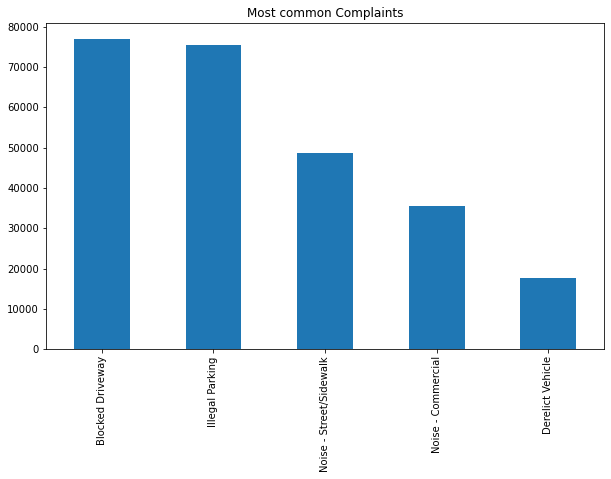

In [68]:
#Most frequent Complaints
(data['Complaint Type'].value_counts()).head().plot(kind='bar',figsize=(10,6), title = 'Most common Complaints')

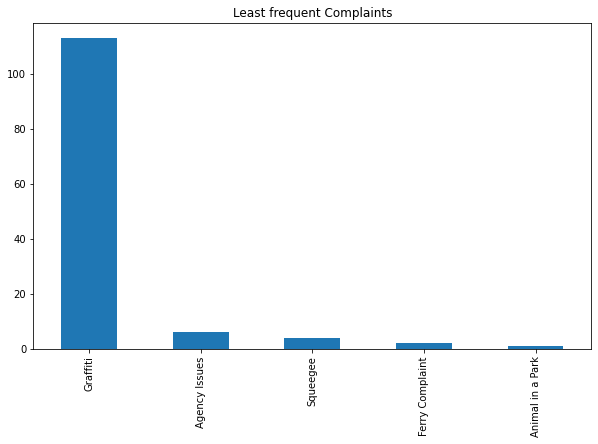

In [69]:
#Least frequent Complaints
(data['Complaint Type'].value_counts()).tail().plot(kind='bar',figsize=(10,6), title = 'Least frequent Complaints')

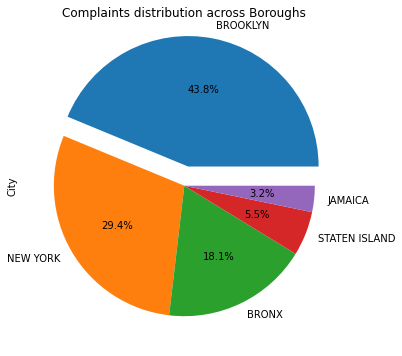

In [70]:
#Pie chart for complaints distribution across City
(data['City'].value_counts()).head().plot(kind='pie',figsize=(10,6),explode = (0.15, 0, 0, 0, 0),autopct='%1.1f%%', title = 'Complaints distribution across Boroughs')

In [71]:
#Analysis for Brooklyn City which has highest number of complains
data_Brooklyn = data[data['City']=='BROOKLYN']

In [72]:
#shape
data_Brooklyn.shape

(98307, 30)

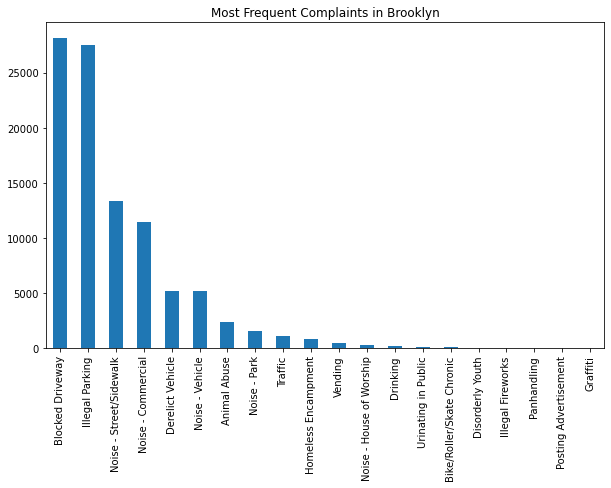

In [73]:
(data_Brooklyn['Complaint Type'].value_counts()).head(25).plot(kind='bar',figsize=(10,6),title = 'Most Frequent Complaints in Brooklyn')

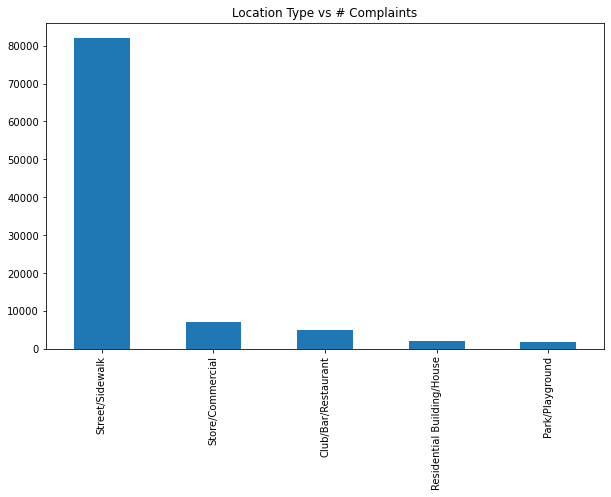

In [74]:
#location type vs complaints
(data_Brooklyn['Location Type'].value_counts()).head().plot(kind='bar',figsize=(10,6),title = 'Location Type vs # Complaints')

In [ ]:
# 4.Average Request_Closing_Time’ grouping them for different locations

In [75]:
# Request_Closing_Time in seconds
data['Request_Closing_Time'] = (data['Closed Date'] - data['Created Date']).dt.total_seconds() 

In [76]:
df_avg_cls_time = data.groupby('City').Request_Closing_Time.mean().sort_values(ascending=True)

In [77]:
df_avg_cls_time

City
ARVERNE                 8153.736364
ROCKAWAY PARK           8348.024161
LITTLE NECK             9279.618962
OAKLAND GARDENS         9471.188748
BAYSIDE                 9645.599509
FAR ROCKAWAY           10043.986429
NEW YORK               10701.442279
FLUSHING               10864.909548
FOREST HILLS           11606.941943
CORONA                 11620.230733
WHITESTONE             11681.330601
FRESH MEADOWS          11750.592417
COLLEGE POINT          11785.070492
JACKSON HEIGHTS        11785.197867
CENTRAL PARK           11859.515464
ELMHURST               11917.865694
REGO PARK              12459.940108
BREEZY POINT           12587.366667
EAST ELMHURST          12879.582510
STATEN ISLAND          13967.801913
Howard Beach           14505.000000
BROOKLYN               14572.730871
Long Island City       14762.731343
Astoria                15064.578212
RIDGEWOOD              15990.456800
ASTORIA                16556.086730
SAINT ALBANS           16995.125899
KEW GARDENS            

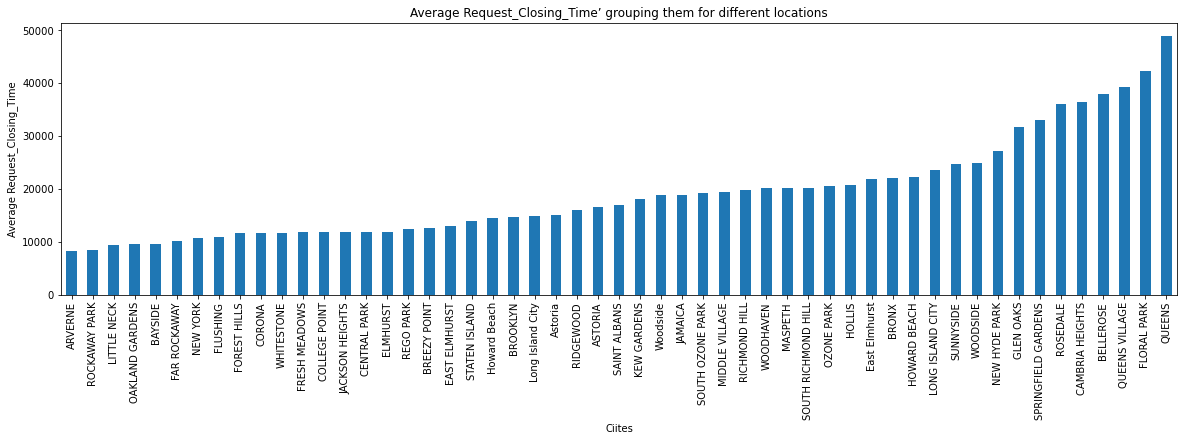

In [78]:
df_avg_cls_time.plot.bar(figsize=(20,5))
plt.xlabel("Ciites")
plt.ylabel("Average Request_Closing_Time")
plt.title("Average Request_Closing_Time’ grouping them for different locations")
plt.show()

In [ ]:
# 5. Null and Alternate  Hypothesis

In [ ]:
# Ho :Average response time across complaint types  is similar

# Ha  :Average response time across complaint types is not similar

In [79]:
#Average response time in seconds across complaint types
df_avg_res_time = data.groupby('Complaint Type').Request_Closing_Time.mean().sort_values(ascending=True)
df_avg_res_time.head(21)

Complaint Type
Posting Advertisement         7112.891975
Illegal Fireworks             9940.101190
Noise - Commercial           11329.755979
Noise - House of Worship     11495.874058
Noise - Park                 12278.636997
Noise - Street/Sidewalk      12402.806681
Traffic                      12415.252002
Disorderly Youth             12810.902098
Noise - Vehicle              12920.376270
Urinating in Public          13055.991554
Bike/Roller/Skate Chronic    13559.264151
Drinking                     13902.598431
Vending                      14450.107246
Squeegee                     14564.250000
Homeless Encampment          15716.052536
Panhandling                  15741.963934
Illegal Parking              16204.145454
Blocked Driveway             17067.258638
Animal Abuse                 18767.677781
Agency Issues                18937.166667
Graffiti                     25744.504425
Name: Request_Closing_Time, dtype: float64

In [82]:
data[['Complaint Type','Request_Closing_Time']].isnull().sum()
data[['Complaint Type','Request_Closing_Time']].dropna()

,Complaint Type,Request_Closing_Time
61125,Noise - Commercial,60.0
163683,Noise - Commercial,120.0
60357,Posting Advertisement,120.0
222119,Noise - Street/Sidewalk,120.0
260083,Noise - Commercial,120.0
...,...,...
12168,Derelict Vehicle,804132.0
283132,Animal in a Park,1212605.0
21268,Animal Abuse,1869361.0
23664,Illegal Parking,2078496.0


In [85]:
data1 = data[data['Complaint Type']=='Blocked Driveway']['Request_Closing_Time']
data1.head()

134547    171.0
291275    180.0
284817    238.0
48836     240.0
121201    240.0
Name: Request_Closing_Time, dtype: float64

In [86]:
data2 = data[data['Complaint Type']=='Illegal Parking']['Request_Closing_Time']
data2.head()

68002     157.0
234706    167.0
5166      171.0
200755    171.0
81672     180.0
Name: Request_Closing_Time, dtype: float64

In [87]:
data_1=data[data['Complaint Type']=='Blocked Driveway']['Request_Closing_Time']
data_2=data[data['Complaint Type']=='Urinating in Public']['Request_Closing_Time']
data_3=data[data['Complaint Type']=='Illegal Fireworks']['Request_Closing_Time']
st.f_oneway(data_1,data2)

F_onewayResult(statistic=nan, pvalue=nan)

In [ ]:
# From the above data null hypothesis can be rejected . Since the average response time across complaint type are not equal

In [ ]:
# Ho : Type of complaint  and location related

# Ha : Type of complaint  and location not related

In [55]:
com =data.groupby(['Complaint Type'])

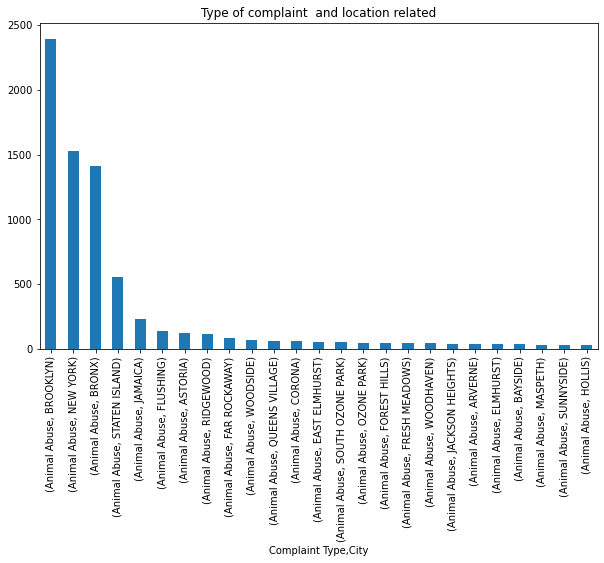

In [56]:
(com['City'].value_counts()).head(25).plot(kind='bar',figsize=(10,6),title = 'Type of complaint  and location related')

In [57]:
df_city_type = pd.crosstab(data['City'], data['Complaint Type'])

In [58]:
stat, p, dof, expected = chi2_contingency(df_city_type)

In [59]:
p

0.0

In [ ]:
# From the above data null hypothesis can be rejected  . Since the p value is less than alpha (0.05)